### 1. Import and Install Dependencies

In [7]:
# !pip install tensorflow==2.5 tensorflow-gpu==2.5
# !pip install opencv-python mediapipe sklearn matplotlib

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
#     FACEMESH_CONTOURS, FACEMESH_TESSELATION
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic. FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [6]:
# cap = cv2.VideoCapture(0)
# # Set mediapipe model 
# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
#     while cap.isOpened():

#         # Read feed
#         ret, frame = cap.read()

#         # Make detections
#         image, results = mediapipe_detection(frame, holistic)
#         print(results)
        
#         # Draw landmarks
#         draw_styled_landmarks(image, results)

#         # Show to screen
#         cv2.imshow('OpenCV Feed', image)

#         # Break gracefully
#         if cv2.waitKey(10) & 0xFF == ord('q'):
#             break
#     cap.release()
#     cv2.destroyAllWindows()

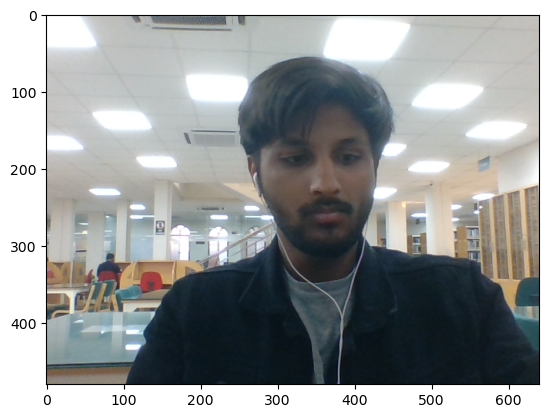

In [13]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [9]:
len(results.left_hand_landmarks.landmark)

NameError: name 'results' is not defined

In [10]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

NameError: name 'results' is not defined

In [11]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

NameError: name 'results' is not defined

In [12]:
face = np.array([[res.x, res.y, res.z] 
for res in results.face_landmarks.landmark]).flatten() 
if results.face_landmarks:
    a=0
else:
    np.zeros(1404)


NameError: name 'results' is not defined

In [7]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [14]:
result_test = extract_keypoints(results)

NameError: name 'results' is not defined

In [15]:
result_test

NameError: name 'result_test' is not defined

In [16]:
np.save('0', result_test)

NameError: name 'result_test' is not defined

In [17]:
np.load('0.npy')

array([0., 0., 0., ..., 0., 0., 0.])

# 4. Setup Folders for Collection

In [8]:
PSLDataset = os.path.join('Dataset\PSL Dataset') 
GeneralDataset = os.path.join('Dataset\General Dataset') 
PersonalDataset = os.path.join('Dataset\Personal Dataset') 
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect 'Eye','Nose',
# actions = np.array(['Eye'])
actions = np.array(['Ankle','Blood','Fist','Heart','Jaw','Knuckle',
                    'Lips','Palm','Skull','Thumb'])

# number of augmentations(Techniaues)
augmentation = 1
# augmentation += 1

# Thirty videos worth of data
no_sequences = 0

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 0

In [9]:
# for action in actions: 
#     dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
#     for sequence in range(1,no_sequences+1):
#         try: 
#             os.makedirs(os.path.join(DATA_PATH, action, str(dirmax+sequence)))
#         except:
#             pass

# finding minimum number of videos of sign
minVideos = 9999
maxVideos = -9999

for action in actions: 
#     counting files of psl
    files=os.path.join(PSLDataset,action) 
    file_list = os.listdir(files)
    no_sequences=len(file_list)*augmentation
#     counting files of general
    files=os.path.join(GeneralDataset,action)
    file_list = os.listdir(files)
    no_sequences+=(len(file_list)*augmentation)
    #     counting files of Personal
    files=os.path.join(PersonalDataset,action)
    file_list = os.listdir(files)
    no_sequences+=(len(file_list)*augmentation)
    print("Number of Videos \t'",action," ' = ",no_sequences)
    if no_sequences<minVideos:
        minVideos=no_sequences
    if no_sequences>maxVideos:
        maxVideos=no_sequences
#     print(action,no_sequences,len(file_list))
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass
        
print("Minimum Nubmber of Videos: ",minVideos)
print("Minimum Nubmber of Videos: ",maxVideos)

Number of Videos 	' Ankle  ' =  33
Number of Videos 	' Blood  ' =  34
Number of Videos 	' Fist  ' =  33
Number of Videos 	' Heart  ' =  40
Number of Videos 	' Jaw  ' =  35
Number of Videos 	' Knuckle  ' =  41
Number of Videos 	' Lips  ' =  35
Number of Videos 	' Palm  ' =  38
Number of Videos 	' Skull  ' =  45
Number of Videos 	' Thumb  ' =  43
Minimum Nubmber of Videos:  33
Minimum Nubmber of Videos:  45


# 5. Collect Keypoint Values for Training and Testing

# orignal video Data+Augumetations

In [8]:
import imageio
import imgaug as ia
import imgaug.augmenters as iaa
# cap = cv2.VideoCapture(0)
# Set mediapipe model 
def startFolder(action):
    folders=os.path.join('MP_Data',action) 
    folder_list = os.listdir(folders)
    entries = sorted(folder_list, key=lambda x: int(x.split('.')[0]))
    for f in entries:
        data = os.path.join('MP_Data',action,f)
        num = os.listdir(data)
        if len(num)==0:
            return f    

def DataCollectiion(trainDataset,trainType):
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

        # NEW LOOP
        # Loop through actions
#         actions = ['Ankle']
        for action in actions:
            files=os.path.join(trainDataset,action) 
            file_list = os.listdir(files)

            no_sequences=len(file_list)
            print(action," Videos \t= ",no_sequences)
            
            # Loop through sequences aka videos
            for sequence in range(start_folder, start_folder+no_sequences):
                cap = cv2.VideoCapture(os.path.join(trainDataset, action,str(sequence)+".mp4"))
                print(os.path.join(trainDataset, action,str(sequence)+".mp4"))
#               Calculating frames
                frame_count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
                fps = cap.get(cv2.CAP_PROP_FPS)
                duration = frame_count/fps
                duration = (duration/32)*1000
                count = 0
                print("Trainig Type: ",trainType)
                print("Frame Count",frame_count)
                print("fps",fps)
                print("Duration",duration)
                print("Update: ",duration/30)
                print("Frame Time: ",duration)

                # saving folder
                folder = startFolder(action)
                
                # Loop through video length aka sequence length
                for frame_num in range(sequence_length):

                    # Read feed
                    ret, frame = cap.read()
    #                 skipping frames
                    cap.set(cv2.CAP_PROP_POS_MSEC, (count*duration))    
                    # move the time
                    success,image = cap.read()
                    count += 1
#                     print(sequence,ret,frame_num)
    #                 print(frame)

#                   horizontal
                    if(trainType=='horizontal'):
                        hflip = iaa.Fliplr(p=1.0)
                        frame = hflip.augment_image(frame)
#                     rotate left
                    elif (trainType=='left'):
                        rot1 = iaa.Affine(rotate=(-10,-9))
                        frame = rot1.augment_image(frame)
#                     rotate right
                    elif (trainType=='right'):
                        rot1 = iaa.Affine(rotate=(9,10))
                        frame = rot1.augment_image(frame)
                    # Make detections
                    image, results = mediapipe_detection(frame, holistic)

                    # Draw landmarks
                    draw_styled_landmarks(image, results)

                    # NEW Apply wait logic
                    if frame_num == 0: 
                        cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                                   cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                        cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                        # Show to screen
#                         cv2.imshow('OpenCV Feed', image)
#                         cv2.waitKey(1000)
                    else: 
                        cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
    #                     Show to screen
#                         cv2.imshow('OpenCV Feed', image)
    #                     cv2.waitKey(round((duration/30)*1000))


                    # NEW Export keypoints
                    keypoints = extract_keypoints(results)
#                     if(trainType=='horizontal'):
#                         npy_path = os.path.join(DATA_PATH, action, str(sequence+no_sequences), str(frame_num))
#                     elif (trainType=='left'):
#                         npy_path = os.path.join(DATA_PATH, action, str(sequence+(no_sequences*2)), str(frame_num))
#                     elif (trainType=='right'):
#                         npy_path = os.path.join(DATA_PATH, action, str(sequence+(no_sequences*3)), str(frame_num))
#                     else:
                    npy_path = os.path.join(DATA_PATH, action, folder, str(frame_num))
                    np.save(npy_path, keypoints)
#                     print("npy Frame: ",npy_path)
                    # Break gracefully
                    if cv2.waitKey(10) & 0xFF == ord('q'):
                        break

        cap.release()
        cv2.destroyAllWindows()

In [9]:
cap.release()
cv2.destroyAllWindows()

NameError: name 'cap' is not defined

# Collecting Data

In [33]:
# PSL Dataset
DataCollectiion(PSLDataset,'')
# DataCollectiion(PSLDataset,'horizontal')
# DataCollectiion(PSLDataset,'left')
# DataCollectiion(PSLDataset,'right')

# Personal Dataset
DataCollectiion(PersonalDataset,'')
# DataCollectiion(PersonalDataset,'horizontal')
# DataCollectiion(PersonalDataset,'left')
# DataCollectiion(PersonalDataset,'right')

# General Dataset
DataCollectiion(GeneralDataset,'')
# DataCollectiion(GeneralDataset,'horizontal')
# DataCollectiion(GeneralDataset,'left')
# DataCollectiion(GeneralDataset,'right')

Ankle 2
Dataset\PSL Dataset\Ankle\0.mp4
Trainig Type:  
Frame Count 123.0
fps 25.083333333333332
Duration 153.23920265780734
Update:  5.1079734219269115
Frame Time:  153.23920265780734
Dataset\PSL Dataset\Ankle\1.mp4
Trainig Type:  
Frame Count 117.0
fps 25.083333333333332
Duration 145.7641196013289
Update:  4.858803986710964
Frame Time:  145.7641196013289
Blood 2
Dataset\PSL Dataset\Blood\0.mp4
Trainig Type:  
Frame Count 98.0
fps 25.0
Duration 122.5
Update:  4.083333333333333
Frame Time:  122.5
Dataset\PSL Dataset\Blood\1.mp4
Trainig Type:  
Frame Count 99.0
fps 25.0
Duration 123.75
Update:  4.125
Frame Time:  123.75
Fist 2
Dataset\PSL Dataset\Fist\0.mp4
Trainig Type:  
Frame Count 87.0
fps 25.0
Duration 108.75
Update:  3.625
Frame Time:  108.75
Dataset\PSL Dataset\Fist\1.mp4
Trainig Type:  
Frame Count 94.0
fps 25.0
Duration 117.5
Update:  3.9166666666666665
Frame Time:  117.5
Heart 2
Dataset\PSL Dataset\Heart\0.mp4
Trainig Type:  
Frame Count 91.0
fps 25.0
Duration 113.75
Update:  

Dataset\Personal Dataset\Blood\11.mp4
Trainig Type:  
Frame Count 54.0
fps 29.5955277869122
Duration 57.01875
Update:  1.900625
Frame Time:  57.01875
Dataset\Personal Dataset\Blood\12.mp4
Trainig Type:  
Frame Count 113.0
fps 29.59466655802679
Duration 119.32048611111111
Update:  3.977349537037037
Frame Time:  119.32048611111111
Dataset\Personal Dataset\Blood\13.mp4
Trainig Type:  
Frame Count 120.0
fps 29.59471679500178
Duration 126.71180555555556
Update:  4.223726851851852
Frame Time:  126.71180555555556
Dataset\Personal Dataset\Blood\14.mp4
Trainig Type:  
Frame Count 104.0
fps 29.594592030960495
Duration 109.81736111111113
Update:  3.6605787037037043
Frame Time:  109.81736111111113
Dataset\Personal Dataset\Blood\15.mp4
Trainig Type:  
Frame Count 100.0
fps 29.59455460195324
Duration 105.59375
Update:  3.519791666666667
Frame Time:  105.59375
Dataset\Personal Dataset\Blood\16.mp4
Trainig Type:  
Frame Count 74.0
fps 29.594212687296707
Duration 78.14027777777778
Update:  2.6046759259

Dataset\Personal Dataset\Heart\14.mp4
Trainig Type:  
Frame Count 119.0
fps 29.59470998013203
Duration 125.65590277777777
Update:  4.188530092592592
Frame Time:  125.65590277777777
Dataset\Personal Dataset\Heart\15.mp4
Trainig Type:  
Frame Count 119.0
fps 29.59470998013203
Duration 125.65590277777777
Update:  4.188530092592592
Frame Time:  125.65590277777777
Dataset\Personal Dataset\Heart\16.mp4
Trainig Type:  
Frame Count 101.0
fps 29.59456423713418
Duration 106.64965277777777
Update:  3.554988425925926
Frame Time:  106.64965277777777
Dataset\Personal Dataset\Heart\17.mp4
Trainig Type:  
Frame Count 92.0
fps 29.59446998019887
Duration 97.14652777777776
Update:  3.238217592592592
Frame Time:  97.14652777777776
Dataset\Personal Dataset\Heart\18.mp4
Trainig Type:  
Frame Count 126.0
fps 29.594755412656326
Duration 133.04722222222222
Update:  4.434907407407407
Frame Time:  133.04722222222222
Dataset\Personal Dataset\Heart\19.mp4
Trainig Type:  
Frame Count 148.0
fps 29.594212687296707
Du

Dataset\Personal Dataset\Knuckle\14.mp4
Trainig Type:  
Frame Count 268.0
fps 60.036290593567756
Duration 139.49895833333335
Update:  4.6499652777777785
Frame Time:  139.49895833333335
Dataset\Personal Dataset\Knuckle\15.mp4
Trainig Type:  
Frame Count 246.0
fps 60.03628208917584
Duration 128.04756944444446
Update:  4.2682523148148155
Frame Time:  128.04756944444446
Dataset\Personal Dataset\Knuckle\16.mp4
Trainig Type:  
Frame Count 197.0
fps 60.03596062616187
Duration 102.54270833333332
Update:  3.4180902777777775
Frame Time:  102.54270833333332
Dataset\Personal Dataset\Knuckle\17.mp4
Trainig Type:  
Frame Count 85.0
fps 29.594382870074856
Duration 89.75520833333334
Update:  2.991840277777778
Frame Time:  89.75520833333334
Dataset\Personal Dataset\Knuckle\18.mp4
Trainig Type:  
Frame Count 90.0
fps 29.59444647424187
Duration 95.03472222222223
Update:  3.1678240740740744
Frame Time:  95.03472222222223
Dataset\Personal Dataset\Knuckle\19.mp4
Trainig Type:  
Frame Count 105.0
fps 29.5946

Dataset\Personal Dataset\Palm\1.mp4
Trainig Type:  
Frame Count 128.0
fps 30.0
Duration 133.33333333333334
Update:  4.444444444444445
Frame Time:  133.33333333333334
Dataset\Personal Dataset\Palm\2.mp4
Trainig Type:  
Frame Count 114.0
fps 30.102983892263005
Duration 118.34375
Update:  3.9447916666666667
Frame Time:  118.34375
Dataset\Personal Dataset\Palm\3.mp4
Trainig Type:  
Frame Count 125.0
fps 30.104442345309995
Duration 129.7565972222222
Update:  4.325219907407407
Frame Time:  129.7565972222222
Dataset\Personal Dataset\Palm\4.mp4
Trainig Type:  
Frame Count 111.0
fps 30.104597656120514
Duration 115.22326388888888
Update:  3.8407754629629625
Frame Time:  115.22326388888888
Dataset\Personal Dataset\Palm\5.mp4
Trainig Type:  
Frame Count 140.0
fps 30.104361787530106
Duration 145.32777777777778
Update:  4.8442592592592595
Frame Time:  145.32777777777778
Dataset\Personal Dataset\Palm\6.mp4
Trainig Type:  
Frame Count 103.0
fps 30.10307135759331
Duration 106.92430555555556
Update:  3.

Dataset\Personal Dataset\Skull\20.mp4
Trainig Type:  
Frame Count 127.0
fps 29.593995241140572
Duration 134.10659722222223
Update:  4.470219907407408
Frame Time:  134.10659722222223
Dataset\Personal Dataset\Skull\21.mp4
Trainig Type:  
Frame Count 121.0
fps 29.59472349723212
Duration 127.76770833333332
Update:  4.25892361111111
Frame Time:  127.76770833333332
Dataset\Personal Dataset\Skull\22.mp4
Trainig Type:  
Frame Count 107.0
fps 29.594618266302394
Duration 112.98506944444445
Update:  3.766168981481482
Frame Time:  112.98506944444445
Dataset\Personal Dataset\Skull\23.mp4
Trainig Type:  
Frame Count 121.0
fps 29.59472349723212
Duration 127.76770833333332
Update:  4.25892361111111
Frame Time:  127.76770833333332
Thumb 23
Dataset\Personal Dataset\Thumb\0.mp4
Trainig Type:  
Frame Count 112.0
fps 30.104649495866585
Duration 116.2611111111111
Update:  3.87537037037037
Frame Time:  116.2611111111111
Dataset\Personal Dataset\Thumb\1.mp4
Trainig Type:  
Frame Count 96.0
fps 30.104739405849

Fist 11
Dataset\General Dataset\Fist\0.mp4
Trainig Type:  
Frame Count 64.0
fps 29.88962632777919
Duration 66.91284722222223
Update:  2.230428240740741
Frame Time:  66.91284722222223
Dataset\General Dataset\Fist\1.mp4
Trainig Type:  
Frame Count 47.0
fps 29.85243159699923
Duration 49.20034722222222
Update:  1.640011574074074
Frame Time:  49.20034722222222
Dataset\General Dataset\Fist\2.mp4
Trainig Type:  
Frame Count 73.0
fps 29.59419467304496
Duration 77.084375
Update:  2.5694791666666665
Frame Time:  77.084375
Dataset\General Dataset\Fist\3.mp4
Trainig Type:  
Frame Count 49.0
fps 29.773759933025918
Duration 51.42951388888889
Update:  1.7143171296296298
Frame Time:  51.42951388888889
Dataset\General Dataset\Fist\4.mp4
Trainig Type:  
Frame Count 64.0
fps 29.5955277869122
Duration 67.57777777777778
Update:  2.2525925925925927
Frame Time:  67.57777777777778
Dataset\General Dataset\Fist\5.mp4
Trainig Type:  
Frame Count 82.0
fps 29.5943409845532
Duration 86.58749999999999
Update:  2.886

Dataset\General Dataset\Knuckle\11.mp4
Trainig Type:  
Frame Count 76.0
fps 30.10457378261329
Duration 78.89166666666667
Update:  2.629722222222222
Frame Time:  78.89166666666667
Lips 0
Palm 9
Dataset\General Dataset\Palm\0.mp4
Trainig Type:  
Frame Count 135.0
fps 29.99637080945762
Duration 140.6420138888889
Update:  4.68806712962963
Frame Time:  140.6420138888889
Dataset\General Dataset\Palm\1.mp4
Trainig Type:  
Frame Count 123.0
fps 29.915523102782927
Duration 128.48680555555555
Update:  4.282893518518518
Frame Time:  128.48680555555555
Dataset\General Dataset\Palm\2.mp4
Trainig Type:  
Frame Count 76.0
fps 29.594247293683964
Duration 80.25208333333333
Update:  2.6750694444444445
Frame Time:  80.25208333333333
Dataset\General Dataset\Palm\3.mp4
Trainig Type:  
Frame Count 97.0
fps 29.59452450446969
Duration 102.42604166666666
Update:  3.414201388888889
Frame Time:  102.42604166666666
Dataset\General Dataset\Palm\4.mp4
Trainig Type:  
Frame Count 110.0
fps 29.594643070668422
Duratio

# 6. Preprocess Data and Create Labels and Features

In [10]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [11]:
label_map = {label:num for num, label in enumerate(actions)}

In [12]:
label_map

{'Ankle': 0,
 'Blood': 1,
 'Fist': 2,
 'Heart': 3,
 'Jaw': 4,
 'Knuckle': 5,
 'Lips': 6,
 'Palm': 7,
 'Skull': 8,
 'Thumb': 9}

In [37]:
sequences, labels = [], []
for action in actions:
#     for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
    for sequence in range(30):  
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
#             print((os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num))))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [109]:
np.array(sequences).shape

(300, 30, 1662)

In [110]:
np.array(labels).shape

(300,)

In [111]:
X = np.array(sequences)

In [112]:
X.shape

(300, 30, 1662)

In [113]:
y = to_categorical(labels).astype(int)

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [119]:
y_test.shape

(15, 10)

# 7. Build and Train LSTM Neural Network

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
import os

In [14]:
# !nvidia-smi
import subprocess

result = subprocess.run(['nvidia-smi'], stdout=subprocess.PIPE)
output = result.stdout.decode('utf-8')

print(output)

Sun May  7 15:19:28 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 531.79                 Driver Version: 531.79       CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                      TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3050 T...  WDDM | 00000000:01:00.0 Off |                  N/A |
| N/A   48C    P3               12W /  N/A|      0MiB /  4096MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [15]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [16]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='tanh', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='tanh'))
model.add(LSTM(64, return_sequences=False, activation='tanh'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [124]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [125]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
9/9 [==============================] - 2s 67ms/step - loss: 2.3205 - categorical_accuracy: 0.0807
Epoch 2/2000
9/9 [==============================] - 0s 13ms/step - loss: 2.3229 - categorical_accuracy: 0.0807
Epoch 3/2000
9/9 [==============================] - 0s 13ms/step - loss: 2.3113 - categorical_accuracy: 0.1053
Epoch 4/2000
9/9 [==============================] - 0s 12ms/step - loss: 2.3049 - categorical_accuracy: 0.0912
Epoch 5/2000
9/9 [==============================] - 0s 15ms/step - loss: 2.3067 - categorical_accuracy: 0.1018
Epoch 6/2000
9/9 [==============================] - 0s 14ms/step - loss: 2.2999 - categorical_accuracy: 0.1193
Epoch 7/2000
9/9 [==============================] - 0s 14ms/step - loss: 2.2882 - categorical_accuracy: 0.1088
Epoch 8/2000
9/9 [==============================] - 0s 13ms/step - loss: 2.2739 - categorical_accuracy: 0.1754
Epoch 9/2000
9/9 [==============================] - 0s 13ms/step - loss: 2.2597 - categorical_accuracy: 0.1719
E

9/9 [==============================] - 0s 13ms/step - loss: 0.0417 - categorical_accuracy: 0.9895
Epoch 147/2000
9/9 [==============================] - 0s 14ms/step - loss: 0.0384 - categorical_accuracy: 0.9895
Epoch 148/2000
9/9 [==============================] - 0s 13ms/step - loss: 0.0281 - categorical_accuracy: 0.9930
Epoch 149/2000
9/9 [==============================] - 0s 13ms/step - loss: 0.0295 - categorical_accuracy: 0.9930
Epoch 150/2000
9/9 [==============================] - 0s 14ms/step - loss: 0.0220 - categorical_accuracy: 0.9930
Epoch 151/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0234 - categorical_accuracy: 0.9930
Epoch 152/2000
1/9 [==>...........................] - ETA: 0s - loss: 0.0070 - categorical_accuracy: 1.0000

KeyboardInterrupt: 

In [59]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 30, 64)            442112    
_________________________________________________________________
lstm_7 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_8 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                330       
Total params: 596,906
Trainable params: 596,906
Non-trainable params: 0
________________________________________________

# 8. Make Predictions

In [129]:
res = model.predict(X_test)

In [135]:
actions[np.argmax(res[0])]

'Ankle'

In [136]:
actions[np.argmax(y_test[0])]

'Ankle'

# 9. Save Weights

In [137]:
model.save('Traingin_30Frames_tanh_testsplit0.05.h5')
# model.save('mouth.h5')

In [138]:
# del model

In [17]:
model.load_weights('Traingin_30Frames_tanh_testsplit0.05.h5')
# model.load_weights('mouth.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [17]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [17]:
yhat = model.predict(X_test)

NameError: name 'X_test' is not defined

In [142]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [143]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[11,  1],
        [ 0,  3]],

       [[13,  0],
        [ 1,  1]],

       [[12,  0],
        [ 1,  2]],

       [[14,  1],
        [ 0,  0]],

       [[12,  0],
        [ 1,  2]],

       [[13,  0],
        [ 0,  2]],

       [[12,  1],
        [ 0,  2]]], dtype=int64)

In [144]:
accuracy_score(ytrue, yhat)

0.8

# Testing Through Video

In [18]:
def test_Video(video):
    def printFind(pred):
        for n in pred:
            print(actions[n])
        print('---------')

    # 1. New detection variables
    sequence = []
    sentence = []
    predictions = []
    threshold = 0.5
    print(actions)
    # testing on video
#     video = os.path.join(GeneralDataset,'Fist','9.mp4')
    cap = cv2.VideoCapture(video)

    #   Calculating frames
    frame_count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    fps = cap.get(cv2.CAP_PROP_FPS)
    duration = frame_count/fps
    duration = (duration/35)*1000
    count = 0
    print("Frame Count",frame_count)
    print("fps",fps)
    print("Duration",duration)
    print("Update: ",duration/35)
    print("Frame Time: ",duration)

    # Set mediapipe model 
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        while cap.isOpened():

            # Read feed
            ret, frame = cap.read()
    #         testin--------------
    #         hflip = iaa.Fliplr(p=1.0)
    #         frame = hflip.augment_image(frame)
    #         ------------------
    #       skipping frames
            cap.set(cv2.CAP_PROP_POS_MSEC, (count*duration))    
            # move the time
            success,image = cap.read()
            count += 1
            if success==False:
                break
            # Make detections
            image, results = mediapipe_detection(frame, holistic)
    #         print(results)

            # Draw landmarks
            draw_styled_landmarks(image, results)

            # 2. Prediction logic
            keypoints = extract_keypoints(results)
            sequence.append(keypoints)
            sequence = sequence[-30:]

            if len(sequence) == 30:
                res = model.predict(np.expand_dims(sequence, axis=0))[0]
                printFind(predictions)
    #             print(predictions)
                print("Max: ",actions[np.argmax(res)])
                predictions.append(np.argmax(res))
    # #             predictions.append(np.argmax(res))
    #             predictions.append(res.argsort()[-3:][::-1])
    #             print(actions[res[0]],actions[res[1]],actions[res[2]])


            #3. Viz logic
                if np.unique(predictions[-10:])[0]==np.argmax(res): 
                    if res[np.argmax(res)] > threshold: 

                        if len(sentence) > 0: 
                            if actions[np.argmax(res)] != sentence[-1]:
                                sentence.append(actions[np.argmax(res)])
                        else:
                            sentence.append(actions[np.argmax(res)])

                if len(sentence) > 5: 
                    sentence = sentence[-5:]

                # Viz probabilities
    #             image = prob_viz(res, actions, image, colors)

            cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
            cv2.putText(image, ' '.join(sentence), (3,30), 
                           cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

            # Show to screen
            cv2.imshow('OpenCV Feed', image)

            # Break gracefully
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break
        cap.release()
        cv2.destroyAllWindows()

In [19]:
# testing on video
video = os.path.join(GeneralDataset,'Ankle','10.mp4')

test_Video(video)

['Ankle' 'Blood' 'Fist' 'Heart' 'Jaw' 'Knuckle' 'Lips' 'Palm' 'Skull'
 'Thumb']
Frame Count 134.0
fps 30.103490107783475
Duration 127.18031746031747
Update:  3.6337233560090705
Frame Time:  127.18031746031747
---------
Max:  Blood
Blood
---------
Max:  Blood
Blood
Blood
---------
Max:  Blood
Blood
Blood
Blood
---------
Max:  Thumb
Blood
Blood
Blood
Thumb
---------
Max:  Thumb
Blood
Blood
Blood
Thumb
Thumb
---------
Max:  Ankle


# 11. Test in Real Time

In [20]:
from scipy import stats

In [21]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [22]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

NameError: name 'res' is not defined

<Figure size 1800x1800 with 0 Axes>

In [24]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
#         print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
#             image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

Fist
Lips
Lips
Lips
Lips
Lips
Lips
Lips
Lips
Lips
Jaw
Jaw
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Fist
Fist
Fist
Fist
Fist
Fist
Fist
Jaw
Jaw
Jaw
Jaw
Jaw
Jaw
Lips
Lips
Lips
Lips
Lips
Lips
Lips
Lips
Lips
Jaw
Jaw
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Ankle
Skull
Lips
Lips
Lips
Lips
Lips
Lips
Lips
Lips
Lips
Lips
Lips
Skull
Skull
Skull
Fist
Fist
Fist
Fist
Fist
Skull
Lips
Lips
Lips
Lips
Lips
Lips
Lips
Lips
Lips
Lips
Skull
Skull
Skull
Skull
Skull
Skull
Skull
Skull
Skull
Skull
Skull
Skull
Skull
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Thumb
Palm
Palm
Palm
Thumb
Thumb
Ankle
Ankle
Ankle
Ankle
Thumb
Thumb
Thumb
Thumb
Thumb
Thumb
Thumb
Thumb
Thumb
Fist
Fist
Fist
Fist
Fist
Fist
Jaw
Jaw
Jaw
Jaw
Jaw
Jaw
Jaw
Jaw
Jaw
Jaw
Jaw
Jaw
Jaw
Jaw
Jaw
Jaw
Jaw
Jaw
Jaw
Jaw
Jaw
Jaw
Jaw
Jaw
Jaw
Jaw
Blood
Blood
Blood
Blood
Blood
Fist
Fist
Fist
Fist
Fist
Fist
Fist
Fist
Fist
Ankle
Ankle
Ankle
Ankle
Ankle
Ankle
Ankle
Ankle
Ankle
Ankle
Ankle
Ankle
Ankle
Ankle
Ankle
Ankle
Ankle
Ankle
Ankle
Ankle
Ankle
An